# DeepFactor metrics
Model: DeepFactor

Dataset: electricity, exchange rate, solar_nips, traffic_nips

In this notebook we investigate the difference in evaulation scores when the same model is trained and tested multiple times with the same settings but different random seeds. We also explore if the best and worst seeds are consistently good or bad across all timeseries.

In [1]:
import matplotlib.pyplot as plt

from src.metrics import *

In [2]:
metric = ["MAPE"]
n = 10

### Exchange rate

In [3]:
experiment_path = "/datadrive/experiments/deep_factor/exchange_rate/1B"
exp = load_data(experiment_path)

len(exp)

100

In [4]:
exp[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.053106,6.498951,31.091047,1.036368,0.008791,24.642526,0.209020,0.236077,NaN,138.927595,5.020334,0.000000,6.498952,0.0,2.307516,1.0
1,1.0,0.618898,23.752005,47.975410,1.599180,0.016455,48.114316,0.495096,0.660306,NaN,449.679734,8.325460,0.000000,23.752006,0.0,8.324335,0.0
2,2.0,0.038498,5.983953,30.113565,1.003786,0.006396,31.188212,0.198684,0.223467,NaN,196.129873,4.906437,0.000000,5.983953,0.0,2.619688,1.0
3,3.0,0.061470,7.384435,31.995962,1.066532,0.009511,25.881313,0.230696,0.262468,NaN,127.653630,4.982294,0.000000,7.384435,0.0,2.302112,1.0
4,4.0,0.422031,19.501938,4.801961,0.160065,0.000207,3137.998048,4.061226,1.336949,NaN,16571.230731,3.066517,0.766667,19.501936,1.0,7.447698,1.0


In [5]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.22966008625752296
		Std: 0.0015978452894630528
		Variance: 0.03997305704425235

	Worst seeds:
		Mean: 0.23259568214416504
		Std: 0.0015370468609035015
		Variance: 0.03920518979430199

	Best seeds:
		Mean: 0.22712233662605286
		Std: 0.00047202332643792033
		Variance: 0.021726097911596298


MASE SCORES
	All seeds:
		Mean: 1443.0066868167453
		Std: 22.10600979182235
		Variance: 4.701702860860345

	Worst seeds:
		Mean: 1482.196533203125
		Std: 17.26205825805664
		Variance: 4.154763221740723

	Best seeds:
		Mean: 1405.9312744140625
		Std: 7.430550575256348
		Variance: 2.7259035110473633


MAPE SCORES
	All seeds:
		Mean: 9.796475009733157
		Std: 0.1453432321692346
		Variance: 0.3812390748195082

	Worst seeds:
		Mean: 10.057809829711914
		Std: 0.11437787860631943
		Variance: 0.3381979763507843

	Best seeds:
		Mean: 9.557228088378906
		Std: 0.05085351690649986
		Variance: 0.2255072444677353




In [6]:
exp_array = calculate_timeseries_means(exp, metric, 8)
exp_array.shape

(100, 8, 1)

In [7]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.053106,6.498951,31.091047,1.036368,0.008791,24.642526,0.209020,0.236077,NaN,138.927595,5.020334,0.0,6.498952,0.0,2.307516,1.000000
8,0.0,0.057768,6.802166,31.412418,1.047081,0.008773,25.846207,0.216549,0.245569,NaN,142.693143,5.168440,0.0,6.802165,0.0,2.342313,1.000000
16,0.0,0.063596,7.419778,31.442495,1.048083,0.008757,28.241945,0.235983,0.270006,NaN,144.137020,5.270506,0.0,7.419778,0.0,2.303084,1.000000
24,0.0,0.051597,6.795875,31.072994,1.035766,0.008744,25.906693,0.218685,0.247874,NaN,146.568074,5.080153,0.0,6.795874,0.0,2.609430,1.000000
32,0.0,0.042947,5.788846,30.949823,1.031661,0.008724,22.118858,0.187067,0.209846,NaN,148.920245,5.146285,0.0,5.788845,0.0,2.648659,1.000000
1,1.0,0.618898,23.752005,47.975410,1.599180,0.016455,48.114316,0.495096,0.660306,NaN,449.679734,8.325460,0.0,23.752006,0.0,8.324335,0.000000
9,1.0,0.635427,23.748093,48.259655,1.608655,0.016415,48.223939,0.492034,0.654228,NaN,516.626739,8.419591,0.0,23.748092,0.0,9.799254,0.000000
17,1.0,0.639783,23.563818,48.184841,1.606161,0.016369,47.983330,0.488942,0.648982,NaN,459.085809,8.576478,0.0,23.563819,0.0,8.426172,0.000000
25,1.0,0.569011,22.499126,46.918461,1.563949,0.016344,45.887405,0.479283,0.632754,NaN,351.376241,8.577871,0.0,22.499127,0.0,5.998682,0.066667


(array([4., 0., 2., 0., 0., 1., 1., 0., 0., 4., 1., 1., 0., 3., 0., 1., 1.,
        3., 0., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 4., 2., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 2.,
        3., 0., 2., 3., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        4., 0., 4., 0., 4., 0., 0., 0., 1., 3., 0., 0., 2., 4., 0., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 3., 0.]),
 array([ 0,  9, 68, 70, 72, 81, 31, 54, 13, 17]),
 array([4., 4., 4., 4., 4., 4., 4., 3., 3., 3.]))

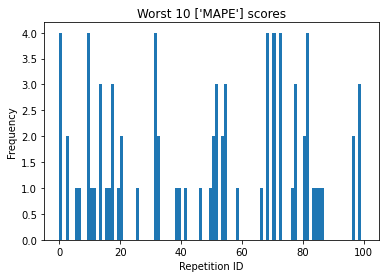

In [8]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([2., 0., 0., 0., 0., 0., 2., 0., 3., 4., 0., 0., 0., 3., 0., 0., 2.,
        3., 0., 1., 2., 0., 0., 0., 1., 1., 0., 0., 0., 2., 0., 2., 3., 1.,
        0., 1., 2., 1., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 2., 0., 1.,
        2., 0., 2., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 4., 0., 2., 0., 1., 2., 0., 4., 0., 0., 4., 3., 0., 0., 1.,
        3., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 4., 1.]),
 array([ 9, 77, 80, 98, 70, 32,  8, 13, 17, 81]),
 array([4., 4., 4., 4., 4., 3., 3., 3., 3., 3.]))

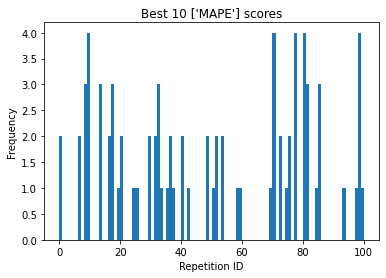

In [9]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Traffic nips

In [10]:
experiment_path = "/datadrive/experiments/deep_factor/traffic_nips/2B"
exp = load_data(experiment_path)

len(exp)

100

In [11]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.010501675552458265
		Std: 0.003531856410849611
		Variance: 0.059429423780225324

	Worst seeds:
		Mean: 0.018100975081324577
		Std: 0.0015762929106131196
		Variance: 0.039702557027339935

	Best seeds:
		Mean: 0.006474856287240982
		Std: 0.0006654012249782681
		Variance: 0.02579537220299244


MASE SCORES
	All seeds:
		Mean: 7.203059085094342
		Std: 1.0717603971235534
		Variance: 1.0352586136437376

	Worst seeds:
		Mean: 9.249567031860352
		Std: 0.32015159726142883
		Variance: 0.5658193826675415

	Best seeds:
		Mean: 5.707547664642334
		Std: 0.28264397382736206
		Variance: 0.531642735004425


MAPE SCORES
	All seeds:
		Mean: 3.441649424553053
		Std: 0.5402044319597602
		Variance: 0.7349860080027103

	Worst seeds:
		Mean: 4.427770137786865
		Std: 0.11497960239648819
		Variance: 0.3390864133834839

	Best seeds:
		Mean: 2.607389450073242
		Std: 0.15244099497795105
		Variance: 0.39043691754341125




In [12]:
exp_array = calculate_timeseries_means(exp, metric, 963)
exp_array.shape

(100, 963, 1)

(array([  0.,   5., 298.,   0.,   0.,   0., 270., 485., 550., 550.,   1.,
          0.,   2., 564., 546.,   0.,   0.,   0.,   0., 276.,   0.,  18.,
          0.,   0., 508.,   0.,   0., 685.,   0.,   0.,   1., 137., 146.,
          0.,   0.,   0., 213.,   0.,  69.,   0.,   2.,   0.,  92.,   0.,
        137.,   0.,   0., 138.,   0.,   1.,   5.,   1.,   0.,   0., 403.,
        303.,   0.,   0.,   0.,   0., 548., 121.,  14.,   0.,   0.,   0.,
        111.,   0.,   0., 413.,   0.,   0.,   0.,  26.,   0.,   0.,  55.,
          0.,  22.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   2.,   0.,
        134.,   0., 137.,   0., 411., 555., 400.,   0.,   0.,   0., 272.,
          0.]),
 array([27, 13, 93,  9,  8, 60, 14, 24,  7, 69]),
 array([685., 564., 555., 550., 550., 548., 546., 508., 485., 413.]))

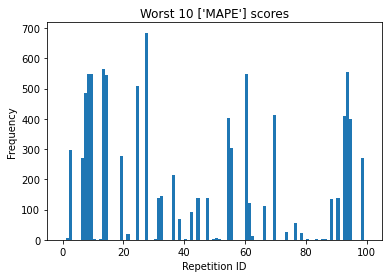

In [13]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([551.,   0.,   0.,   0.,   0., 143., 132.,   1.,   0.,   6.,   0.,
          2.,   0.,   0.,   0.,   2., 220.,  23., 137.,   0.,   0.,   0.,
         33.,   0.,   0.,   3.,   1.,   0., 258., 579.,   0.,   0.,   0.,
          0.,   0.,   4., 169.,   0., 137., 411., 527.,   1.,   0.,  54.,
        121., 137., 177.,   2.,   4., 167.,   0., 138.,  79., 274., 178.,
          0.,   3.,  43.,   9., 397., 133.,   0.,   0., 275.,   0., 261.,
        204., 526., 747.,   0.,   0.,   0., 412., 129., 295.,   1.,   0.,
          0.,   0.,   0.,   0.,   0., 211.,   2.,   0., 416.,   4., 259.,
          0.,   0.,   1.,   0.,   0.,   0., 137.,  84.,   0., 330.,   0.,
         80.]),
 array([68, 29,  0, 40, 67, 85, 72, 39, 59, 97]),
 array([747., 579., 551., 527., 526., 416., 412., 411., 397., 330.]))

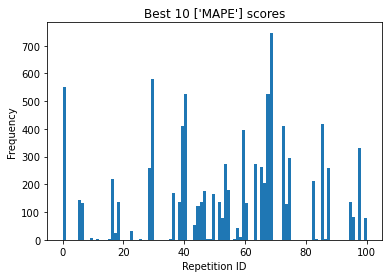

In [14]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Solar nips

In [15]:
experiment_path = "/datadrive/experiments/deep_factor/solar_nips/2B"
exp = load_data(experiment_path)

len(exp)

100

In [16]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 2950.753250543384
		Std: 1234.4185835744402
		Variance: 35.13429355450939

	Worst seeds:
		Mean: 5715.6962890625
		Std: 1851.0357666015625
		Variance: 43.02366638183594

	Best seeds:
		Mean: 1697.9652099609375
		Std: 132.8571319580078
		Variance: 11.5263671875


MASE SCORES
	All seeds:
		Mean: 2.4622588956661047
		Std: 0.43869434260034573
		Variance: 0.662340050578512

	Worst seeds:
		Mean: 3.39115571975708
		Std: 0.40279799699783325
		Variance: 0.6346637010574341

	Best seeds:
		Mean: 1.8189380168914795
		Std: 0.12489073723554611
		Variance: 0.3533988296985626


MAPE SCORES
	All seeds:
		Mean: 4.477283314834018
		Std: 1.2180629767779318
		Variance: 1.1036589041809666

	Worst seeds:
		Mean: 6.9050397872924805
		Std: 0.7759189009666443
		Variance: 0.8808625936508179

	Best seeds:
		Mean: 2.5858962535858154
		Std: 0.43781185150146484
		Variance: 0.6616735458374023




In [17]:
exp_array = calculate_timeseries_means(exp, metric, 137)
exp_array.shape

(100, 137, 1)

(array([20.,  1., 70.,  4.,  0.,  0.,  0.,  3.,  0., 67.,  2.,  0., 19.,
         0., 13.,  2.,  0., 60.,  0., 20.,  0.,  0., 21.,  0.,  0., 48.,
        57., 72.,  0., 29., 45., 36.,  0.,  0.,  0.,  1., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 19.,  0.,  0.,  0., 15., 16.,  0., 61.,
         0.,  0., 30.,  0.,  0., 12.,  0., 16.,  7., 38., 46.,  8.,  0.,
        39.,  0., 20.,  9.,  0.,  0.,  0., 18.,  0., 36., 27., 56.,  0.,
         0., 37.,  0.,  0.,  0.,  0.,  2.,  0., 30.,  0., 69., 29., 62.,
        42.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  5.]),
 array([27,  2, 88,  9, 90, 51, 17, 26, 76, 25]),
 array([72., 70., 69., 67., 62., 61., 60., 57., 56., 48.]))

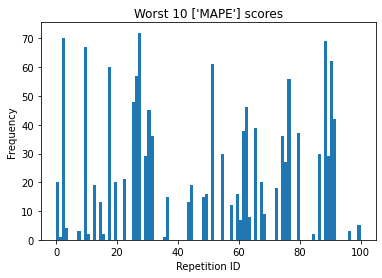

In [18]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([ 9., 20.,  1., 25.,  1., 22.,  3., 40., 11.,  9., 13.,  7., 54.,
         1., 41., 10.,  8.,  3., 89.,  4.,  7., 18., 37.,  0.,  0.,  0.,
         0.,  0., 51., 60., 16.,  1.,  0., 25., 18.,  0., 16., 15., 20.,
         0.,  3.,  5., 13.,  3.,  0.,  4., 22., 32., 54.,  7.,  0.,  5.,
         1.,  8., 21.,  2., 17.,  6.,  1.,  8.,  3., 32.,  0.,  0., 73.,
        13.,  0.,  0.,  0.,  4.,  2.,  8.,  0.,  0.,  1.,  0.,  1.,  0.,
         2.,  3.,  1., 11., 60., 13.,  0., 56., 29., 55.,  0.,  3.,  3.,
        56.,  0.,  1.,  0.,  4.,  4.,  7.,  2., 56.]),
 array([18, 64, 29, 82, 91, 85, 99, 87, 48, 12]),
 array([89., 73., 60., 60., 56., 56., 56., 55., 54., 54.]))

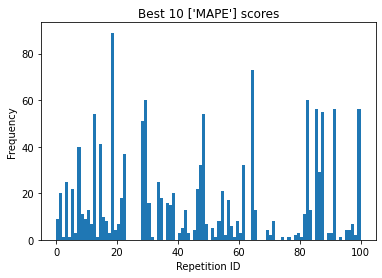

In [19]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Electricity

In [20]:
experiment_path = "/datadrive/experiments/deep_factor/electricity/2B"
exp = load_data(experiment_path)

len(exp)

100

In [21]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 178743064.32064873
		Std: 907230.4019586736
		Variance: 952.486431377725

	Worst seeds:
		Mean: 180476176.0
		Std: 143751.59375
		Variance: 379.1458740234375

	Best seeds:
		Mean: 177452704.0
		Std: 78225.3828125
		Variance: 279.6880187988281


MASE SCORES
	All seeds:
		Mean: 29.63766797097209
		Std: 7.279392482160921
		Variance: 2.6980349297518225

	Worst seeds:
		Mean: 42.42636489868164
		Std: 2.452277183532715
		Variance: 1.5659748315811157

	Best seeds:
		Mean: 18.10588264465332
		Std: 1.658593773841858
		Variance: 1.287864089012146


MAPE SCORES
	All seeds:
		Mean: 5.664022360385659
		Std: 1.4463901928478844
		Variance: 1.202659633000079

	Worst seeds:
		Mean: 8.126752853393555
		Std: 0.5196264982223511
		Variance: 0.7208512425422668

	Best seeds:
		Mean: 3.2094860076904297
		Std: 0.37361404299736023
		Variance: 0.6112397313117981




In [22]:
exp_array = calculate_timeseries_means(exp, metric, 321)
exp_array.shape

(100, 321, 1)

(array([  0.,   0.,  39.,  49.,   1., 155.,   0.,  90.,   0.,   0.,   0.,
          0.,  40.,   0.,   5.,   0.,   0.,  56.,   0.,   0.,   0., 198.,
          0.,   0., 230.,   0., 250.,   1.,   2.,   1.,   1.,   1.,   1.,
        227.,  20.,   0.,   1.,   0.,   0.,  75.,   0.,   0.,   0., 201.,
          0.,   0.,   0., 190.,   0.,  80.,   6.,  89.,   0.,   0.,   0.,
          0.,   0.,  48.,   0.,   0.,   0.,   0.,   0.,   0., 105.,   0.,
          0.,  10., 109.,  33., 192.,   0.,   1.,  16.,  52.,   0., 123.,
          0.,   0.,   0.,   0.,   0.,   0.,  65.,  71.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   8.,  71.,   0.,   0., 224.,   0.,
         73.]),
 array([26, 24, 33, 97, 43, 21, 70, 47,  5, 76]),
 array([250., 230., 227., 224., 201., 198., 192., 190., 155., 123.]))

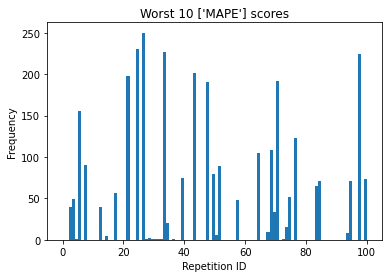

In [23]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([  1.,   1., 139.,   0.,   0.,  68.,  40., 155.,   0.,   0.,  16.,
         40.,   0.,   0.,   0.,   0.,   1., 160.,   0.,   0.,  24.,  39.,
          2.,   0.,  52.,  61.,  34.,   0.,  18.,   0.,   4.,   0.,  51.,
         60., 192.,   0.,  69.,   2.,  57., 181.,   2.,  25.,  28.,  55.,
         23.,   0.,   1.,  62.,   1., 108.,   0., 142.,   0.,   1.,   0.,
          0.,  83.,   0.,  25.,   1.,   0.,   0.,   0.,  18.,   1.,   1.,
          2.,   2.,  16.,   9.,  69.,   1.,   1.,  38.,   0.,   9.,  39.,
          0.,   0.,  51.,   1.,   0.,   0., 183.,  67.,  24.,  24., 141.,
          1.,  15.,   1.,  36.,  21.,   2., 177., 105.,   8.,  45.,  26.,
         52.]),
 array([34, 83, 39, 94, 17,  7, 51, 87,  2, 49]),
 array([192., 183., 181., 177., 160., 155., 142., 141., 139., 108.]))

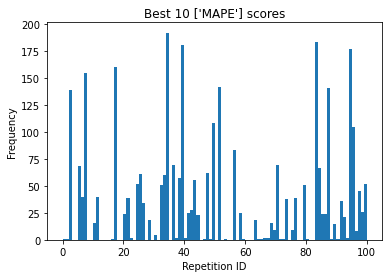

In [24]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]